In [2]:
%cd ../src
import pickle
import pandas as pd
from utils import IMAGE_TYPES, RDF_DATE_TYPES, RDF_NUMBER_TYPES, POTENTIAL_TEXT_TYPES
import matplotlib.pyplot as plt

e:\00_CODE\03_Master_Thesis\rdf-literal-preprocessing\src


c:\Users\Noctris\.virtualenvs\rdf-literal-preprocessing-20b3_M0v\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def load_dataset(dataset):
    with open(f"../data/raw/{dataset}_final_torch_None.pickle", "rb") as f:
        data = pickle.load(f)
    
    print("# nodes")
    print(len(data.i2e))
    print("datatypes")
    print(data.datatypes())
    return data

In [82]:
from kgbench import load
# data = load('mdgenre', torch=True)
data = load_dataset('mdgenre')


# nodes
349344
datatypes
['iri', 'http://kgbench.info/dt#base64Image', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#langString', 'http://www.w3.org/2001/XMLSchema#dateTime', 'http://www.w3.org/2001/XMLSchema#decimal', 'http://www.w3.org/2001/XMLSchema#string']


In [83]:
from utils import get_relevant_relations
rr = get_relevant_relations(data,RDF_NUMBER_TYPES)

In [84]:
rr

[60, 65, 72, 71, 68, 66]

In [99]:
data.i2r[72  ]

'http://www.wikidata.org/prop/direct/P2142'

In [85]:
import numpy as np
for r in rr:
    nums = []
    for t in data.triples[data.triples[:,1]==r]:
        nums.append(data.i2e[t[2]][0])
    print(f'relation {r} contains {len(nums)} and {len(np.unique(nums))} unique values')

relation 60 contains 2398 and 19 unique values
relation 65 contains 8163 and 262 unique values
relation 72 contains 844 and 815 unique values
relation 71 contains 698 and 250 unique values
relation 68 contains 684 and 152 unique values
relation 66 contains 1565 and 167 unique values


In [86]:
nums = []
for t in data.triples[data.triples[:,1]==2   ]:
    nums.append(data.i2e[t[2]][0])

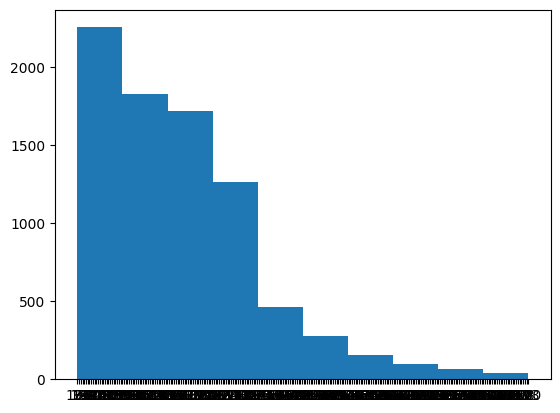

In [97]:
import matplotlib.pyplot as plt

nums = []
for t in data.triples[data.triples[:,1]==65]:
    nums.append(data.i2e[t[2]][0])
plt.hist(nums,bins=10)
plt.show()

In [43]:
nums

['10000',
 '10006',
 '10007',
 '10008',
 '10011',
 '10012',
 '10014',
 '10017',
 '10018',
 '10021',
 '10022',
 '10030',
 '10031',
 '10033',
 '10034',
 '10036',
 '10037',
 '10040',
 '10043',
 '10045',
 '10046',
 '10048',
 '10051',
 '10055',
 '10056',
 '10057',
 '10066',
 '10076',
 '10089',
 '10090',
 '10091',
 '10096',
 '10097',
 '10098',
 '10099',
 '10100',
 '10102',
 '10103',
 '10107',
 '10110',
 '10111',
 '10114',
 '10115',
 '10118',
 '10120',
 '10123',
 '10126',
 '10128',
 '10129',
 '10130',
 '10132',
 '10145',
 '10154',
 '10155',
 '10165',
 '10173',
 '10179',
 '10183',
 '10185',
 '10186',
 '10187',
 '10188',
 '10189',
 '10190',
 '10191',
 '10194',
 '10198',
 '10208',
 '10211',
 '10213',
 '10214',
 '10217',
 '10221',
 '10225',
 '10231',
 '10233',
 '10236',
 '10240',
 '10241',
 '10242',
 '10247',
 '10256',
 '10257',
 '10262',
 '10263',
 '10265',
 '10268',
 '10271',
 '10272',
 '10275',
 '10278',
 '10280',
 '10283',
 '10286',
 '10288',
 '10294',
 '10296',
 '10297',
 '10305',
 '10307',


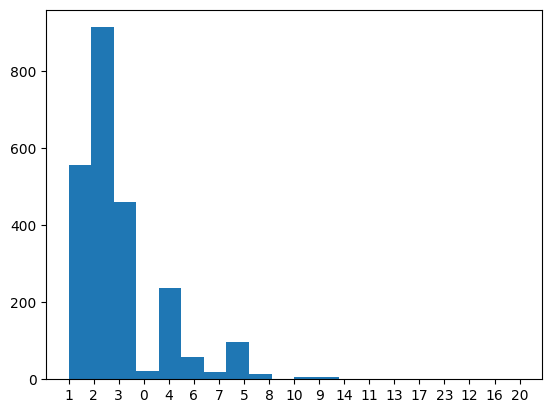

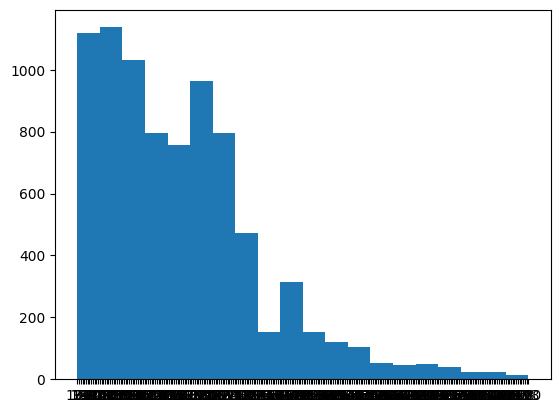

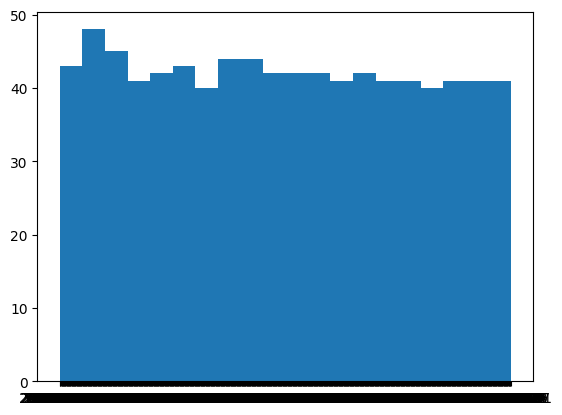

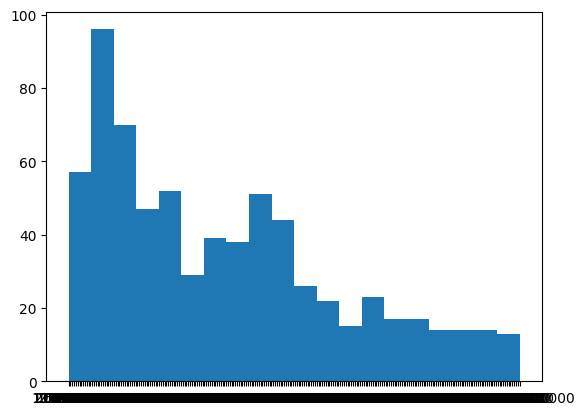

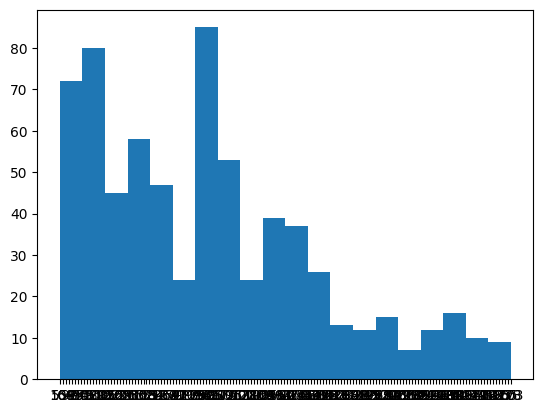

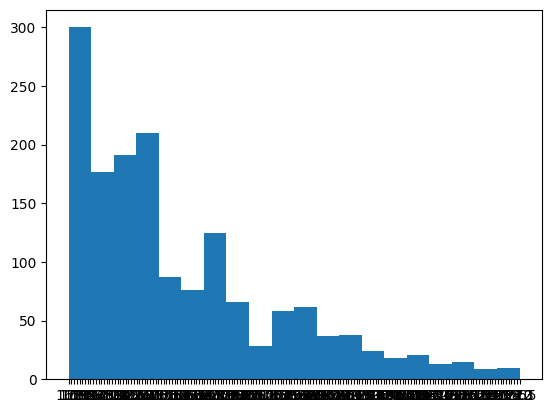

In [87]:
import matplotlib.pyplot as plt
for r in rr:
    nums = []
    for t in data.triples[data.triples[:,1]==r]:
        nums.append(data.i2e[t[2]][0])
    plt.hist(nums,bins=20)
    plt.show()

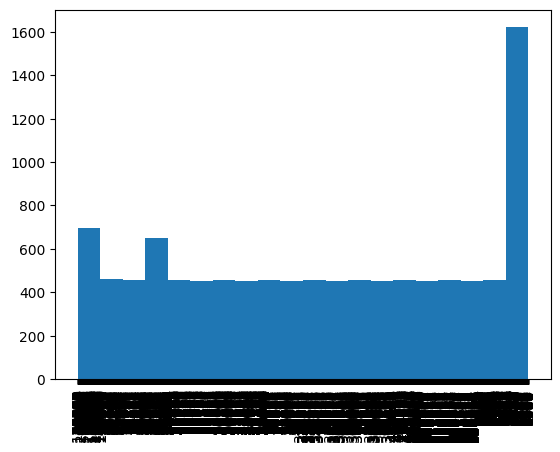

In [50]:
import matplotlib.pyplot as plt
nums = []
for r in rr:

    for t in data.triples[data.triples[:,1]==r]:
        nums.append(data.i2e[t[2]][0])
plt.hist(nums,bins=20 )
plt.xticks(rotation=90)
plt.show()

In [75]:
a,b = np.histogram(np.array(nums, dtype=np.int32), bins=20)
plt.bar(a)

TypeError: bar() missing 1 required positional argument: 'height'

In [64]:
import numpy as np
a,b = np.histogram(np.array(nums, dtype=np.int32), bins=20)

In [60]:
np.array(nums, dtype=np.int32)

array([111805,  36188,  20476, ...,   1714,   1850,   1792])